# Bonus: Temperature Analysis I

In [48]:
import pandas as pd
from datetime import datetime as dt


In [49]:
# "tobs" is "temperature observations"
df = pd.read_csv(r'.\Resources\hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [50]:
# Convert the date column format from string to datetime
df.info()
df['new_date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['month'] = pd.to_datetime(df['new_date'], format='%m')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19550 non-null  object 
 1   date     19550 non-null  object 
 2   prcp     18103 non-null  float64
 3   tobs     19550 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 611.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   station   19550 non-null  object        
 1   date      19550 non-null  object        
 2   prcp      18103 non-null  float64       
 3   tobs      19550 non-null  int64         
 4   new_date  19550 non-null  datetime64[ns]
 5   month     19550 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 916.5+ KB


In [ ]:
# Set the date column as the DataFrame index

In [51]:
# Drop the date column
new_date_df = df[['station', 'prcp', 'tobs', 'new_date']]

new_date_df.head()

,station,prcp,tobs,new_date
0,USC00519397,0.08,65,2010-01-01
1,USC00519397,0.00,63,2010-01-02
2,USC00519397,0.00,74,2010-01-03
3,USC00519397,0.00,76,2010-01-04
4,USC00519397,NaN,73,2010-01-06


### Compare June and December data across all years 

In [63]:
from scipy import stats
%matplotlib inline
from matplotlib import pyplot as plt

In [64]:
# Filter data for desired months
jun_df = (new_date_df[pd.to_datetime(new_date_df['new_date']).dt.month == 6])
jun_df
dec_df = (new_date_df[pd.to_datetime(new_date_df['new_date']).dt.month == 12])
dec_df

,station,prcp,tobs,new_date
305,USC00519397,0.04,76,2010-12-01
306,USC00519397,0.00,74,2010-12-03
307,USC00519397,0.00,74,2010-12-04
308,USC00519397,0.00,64,2010-12-06
309,USC00519397,0.00,64,2010-12-07
...,...,...,...,...
19323,USC00516128,0.14,71,2016-12-27
19324,USC00516128,0.14,71,2016-12-28
19325,USC00516128,1.03,69,2016-12-29
19326,USC00516128,2.37,65,2016-12-30


In [65]:
# Identify the average temperature for June
jun_df['tobs'].mean()

74.94411764705882

In [66]:
# Identify the average temperature for December
dec_df['tobs'].mean()

71.04152933421226

In [101]:
# Create collections of temperature data
union_df = pd.concat([jun_df, dec_df])

temp = stats.norm.rvs(union_df['tobs'], random_state=42)
print(temp)
print(len(temp))

[78.49671415 75.8617357  78.64768854 ... 69.735622   66.78179891
 63.34337679]
3217


In [118]:
# Run paired t-test
# Generate some fake data to test with
def gendata(loc=0):
    jun_data = stats.norm.rvs(jun_df['tobs'], random_state=42)
    dec_data = stats.norm.rvs(dec_df['tobs'],  random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(jun_data)), population, label="Jun Temp")
    plt.scatter(range(len(dec_data)), sample, label="Dec Tem")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(jun_data, 20, density=True, alpha=0.7, label="Jun Temp")
    plt.hist(dec_data, 20, density=True, alpha=0.7, label="Dec Temp")
    plt.axvline(jun_data.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(dec_data.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return jun_data, dec_data

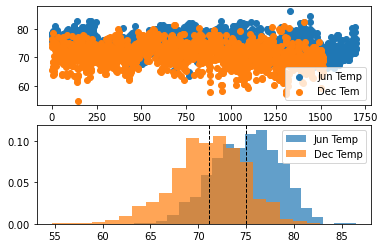

In [119]:
# Generate some data and show the scatter plot
jun_data, dec_data = gendata()

In [120]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-39.400916808712935, pvalue=2.220499280516256e-234)

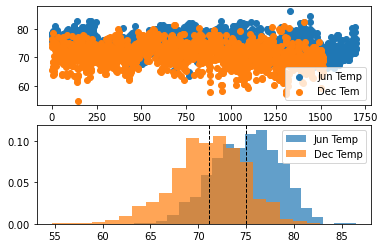

In [116]:
# Generate data with a bigger difference in means
population, sample = gendata(loc=-2)

In [117]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-39.400916808712935, pvalue=2.220499280516256e-234)

### Analysis

In [ ]:
I will use Normally distributed data data